### Exercise 2: Build a linear regression model for diabete progression Problem
##### (10 points) --> your total will divided by 5 to get 5 points for this exercise.
---

Can we use the linear regression model to predict the progress diabete progression based on BMI ?

Our aim in his exercis is apply the linear regression algorithm to a real-life problem. 
In particular, we seek to:
* Build linear rgression models with Cross-Validation
* Using Hyperparameter Tuning Using Grid Search Cross-Validation


** You will find the dataset (diabetes.csv) under the datasets section on Moodle **

### Step to do:

In [2]:
# import the requierd pakages: 
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [3]:
# Load the data with Pandas using read_csv()
# Loading the dataset using pandas
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1- divide the data into features (X) and target (y) --> your target is bmi  (2 point)

In [4]:
# write your code here:
X = df.loc[:, df.columns != 'bmi']
X

,pregnancies,glucose,diastolic,triceps,insulin,dpf,age,diabetes
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,0
764,2,122,70,27,0,0.340,27,0
765,5,121,72,23,112,0.245,30,0
766,1,126,60,0,0,0.349,47,1


In [5]:
# write your code here:
y = df.loc[:,'bmi']
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: bmi, Length: 768, dtype: float64

2- Plot scatter plot to get a better idea of the effect of each feature on the target variable BMI (2 points)

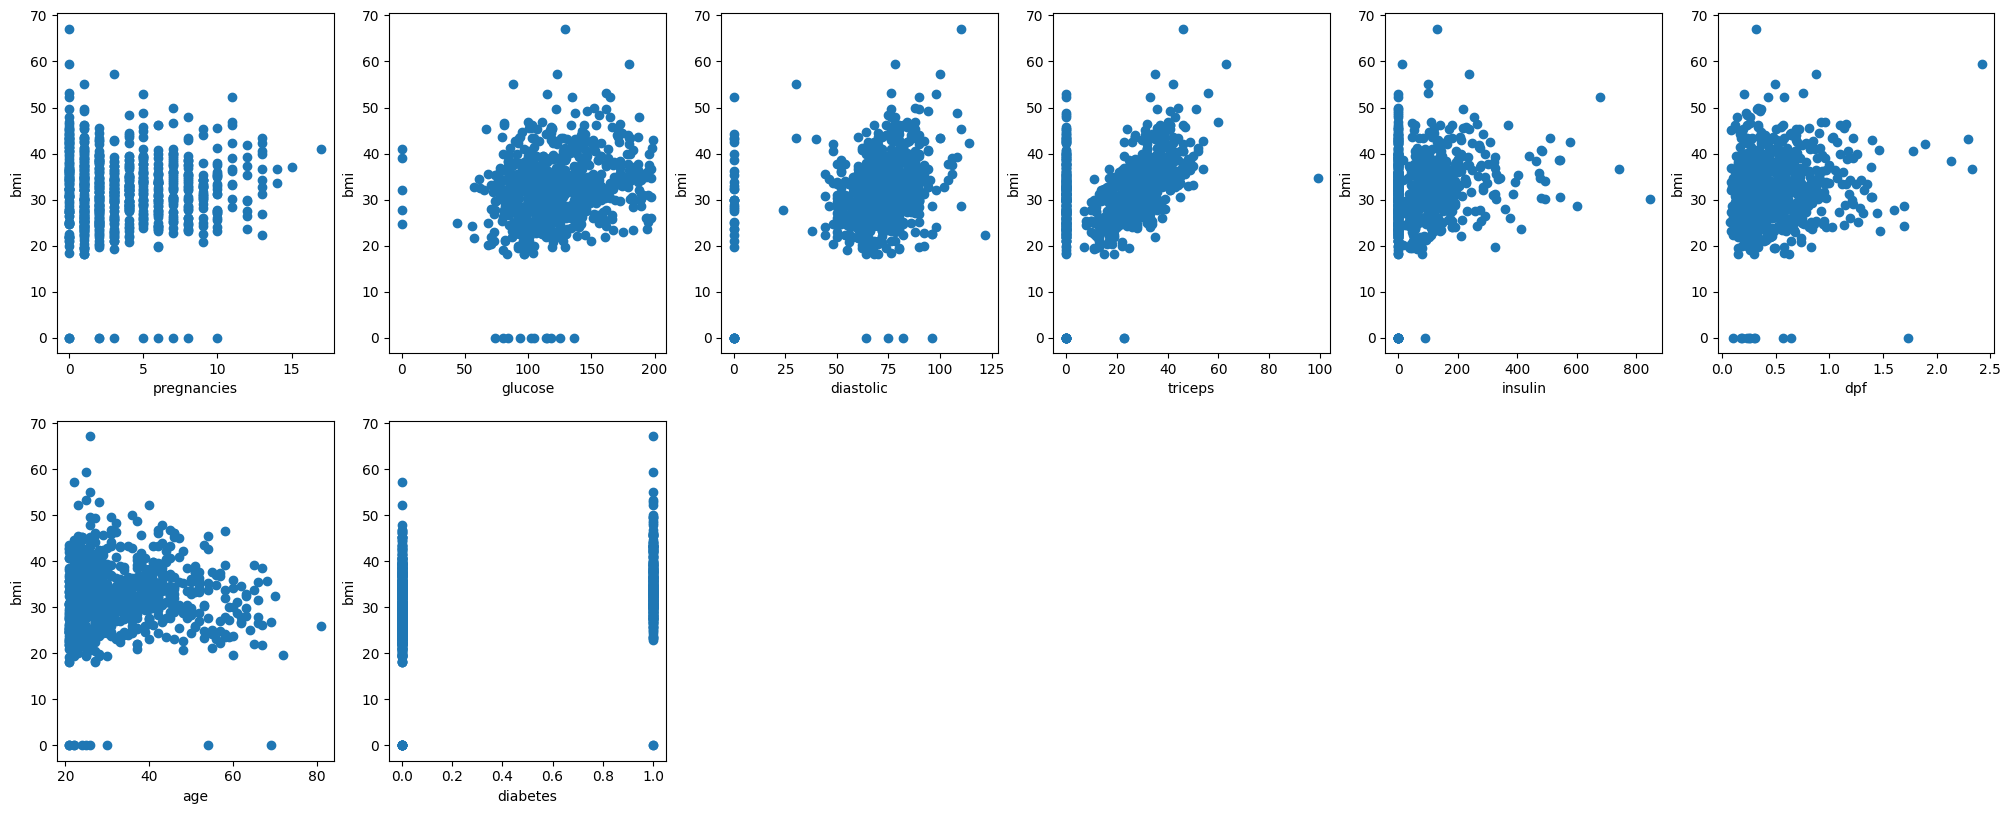

In [24]:
# write your code here:
plt.figure(figsize = ( 25 , 15 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'bmi' )

3- Plotting the box plot to check for outliers using boxplot (2 points)

Text(0.5, 1.0, 'Box Plot')

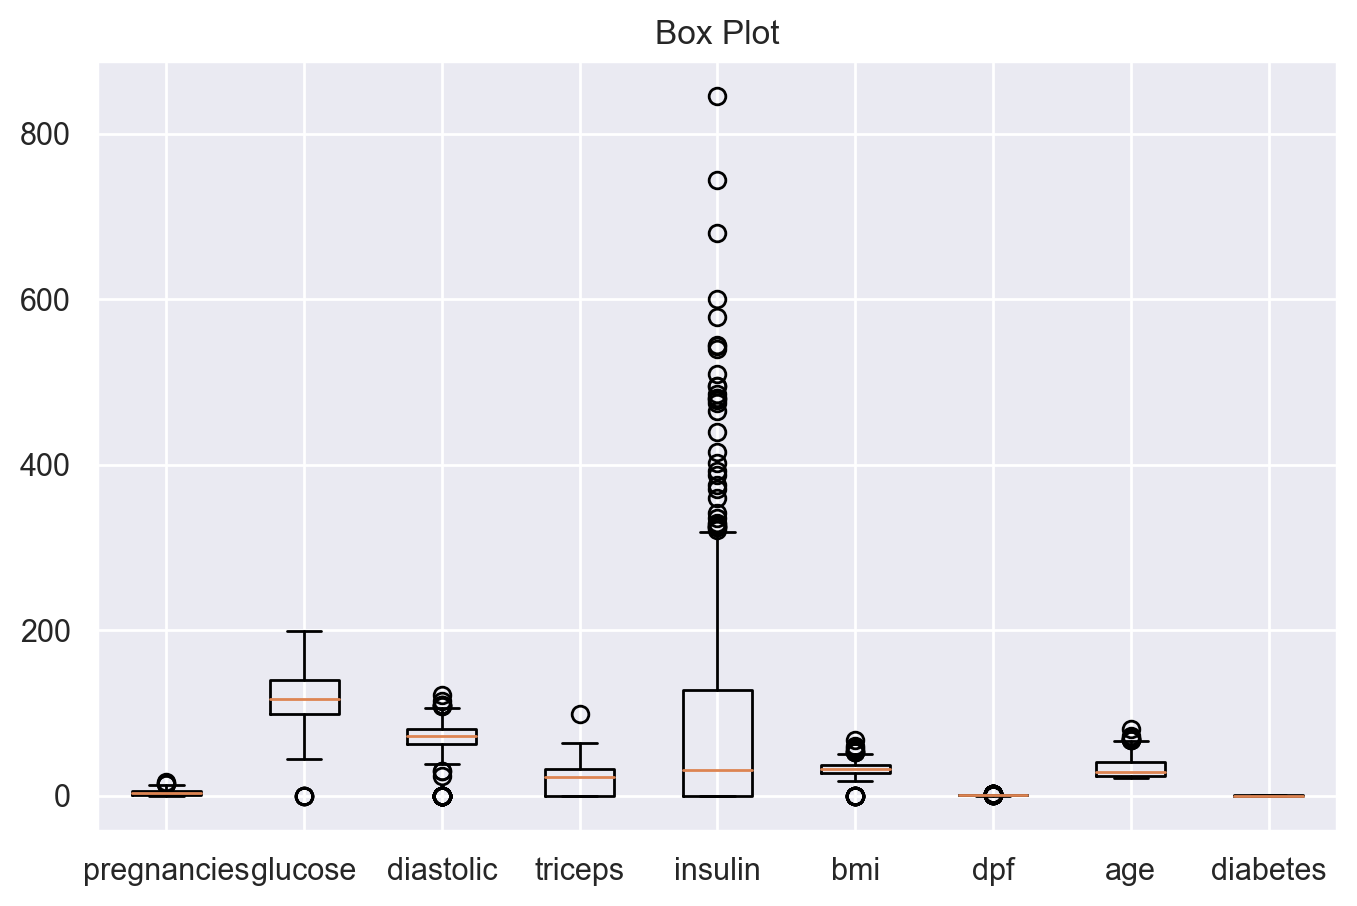

In [16]:
# write your code here:
plt.figure(figsize = ( 8 , 5 )) 
plt.boxplot(df, labels=df.columns)
# Add labels and title
plt.xlabel('')
plt.title('Box Plot')

4- Splitting the data into training and testing sets (2 points)

We train the model with 80% of the samples and test with the remaining 20%.

In [19]:
# write your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)


5- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset, and evaluate the linear regression modle (2 points)
* Use k=5 
* use MSE as your metric

Remember  : 'neg_mean_squared_error' returns the negated value of the MSE, make sure to take the absolute to get the positive one

In [21]:
# write your code here:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(pipeline, X_train, y_train,cv=5, scoring='neg_mean_squared_error')
print("Average 5-Fold CV R2 Score: {}".format((np.mean(-scores)) ))

Average 5-Fold CV R2 Score: 45.42141571249804
